In [253]:
import pandas as pd
import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import numpy as np
#plt.rcParams.update({'font.size': 16})
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble.partial_dependence import plot_partial_dependence
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.inspection import plot_partial_dependence

In [282]:
interviews = pd.read_csv('../data/Interview.csv', parse_dates=['Date of Interview'], dayfirst=True)

def clean_header(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('.', '_').str.replace(':', '_')
    return df.columns

clean_header(interviews)

interviews['observed_attendance'] = interviews['observed_attendance'].map({'Yes': 1, 'No': 0})

interviews.drop(interviews.tail(1).index,inplace=True)

#y = interviews['observed_attendance']

#X = interviews.drop(columns = ['observed_attendance'])
X = interviews
X = X.drop(columns = ['unnamed__23', 'unnamed__24', 'unnamed__25', 'unnamed__26', 'unnamed__27',])

for i in range(len(X['date_of_interview'])):
    try:
        #if type(X['date_of_interview'].iloc[i] == str):
        X['date_of_interview'].iloc[i] = X['date_of_interview'].iloc[i].replace('.', '/')
    except:
        pass
    
X['date_of_interview']= pd.to_datetime(X['date_of_interview'], dayfirst=True, errors='coerce')
X['year'] = pd.DatetimeIndex(X['date_of_interview']).year
X['month'] = pd.DatetimeIndex(X['date_of_interview']).month
X['day'] = pd.DatetimeIndex(X['date_of_interview']).day
X['day_of_week'] = pd.DatetimeIndex(X['date_of_interview']).dayofweek
X = X.drop(columns = ['date_of_interview' , 'year', 'day'])

X['can_i_call_you_three_hours_before_the_interview_and_follow_up_on_your_attendance_for_the_interview'] = X['can_i_call_you_three_hours_before_the_interview_and_follow_up_on_your_attendance_for_the_interview'].map({'Yes': 1, 'No': 0})
X['can_i_have_an_alternative_number/_desk_number__i_assure_you_that_i_will_not_trouble_you_too_much'] = X['can_i_have_an_alternative_number/_desk_number__i_assure_you_that_i_will_not_trouble_you_too_much'].map({'Yes': 1, 'No': 0})
X['have_you_taken_a_printout_of_your_updated_resume__have_you_read_the_jd_and_understood_the_same'] = X['have_you_taken_a_printout_of_your_updated_resume__have_you_read_the_jd_and_understood_the_same'].map({'Yes': 1, 'No': 0})
X['are_you_clear_with_the_venue_details_and_the_landmark_'] = X['are_you_clear_with_the_venue_details_and_the_landmark_'].map({'Yes': 1, 'No': 0})
X['has_the_call_letter_been_shared'] = X['has_the_call_letter_been_shared'].map({'Yes': 1, 'No': 0})
X['have_you_obtained_the_necessary_permission_to_start_at_the_required_time'] = X['have_you_obtained_the_necessary_permission_to_start_at_the_required_time'].map({'Yes': 1, 'No': 0})
X['hope_there_will_be_no_unscheduled_meetings'] = X['hope_there_will_be_no_unscheduled_meetings'].map({'Yes': 1, 'No': 0})
X['expected_attendance'] = X['expected_attendance'].map({'Yes': 1, 'yes': 1 , 'Uncertain': 1, 'No': 0, 'NO': 0, '11:00 AM': 1, '10.30 Am': 1})

X['num_of_questions_answered'] = X['can_i_call_you_three_hours_before_the_interview_and_follow_up_on_your_attendance_for_the_interview']+ X['can_i_have_an_alternative_number/_desk_number__i_assure_you_that_i_will_not_trouble_you_too_much']+ X['have_you_taken_a_printout_of_your_updated_resume__have_you_read_the_jd_and_understood_the_same'] + X['are_you_clear_with_the_venue_details_and_the_landmark_']+ X['has_the_call_letter_been_shared'] + X['have_you_obtained_the_necessary_permission_to_start_at_the_required_time'] + X['hope_there_will_be_no_unscheduled_meetings']

X = X.drop(columns = ['can_i_call_you_three_hours_before_the_interview_and_follow_up_on_your_attendance_for_the_interview', 'can_i_have_an_alternative_number/_desk_number__i_assure_you_that_i_will_not_trouble_you_too_much', 'have_you_taken_a_printout_of_your_updated_resume__have_you_read_the_jd_and_understood_the_same', 'are_you_clear_with_the_venue_details_and_the_landmark_', 'has_the_call_letter_been_shared', 'have_you_obtained_the_necessary_permission_to_start_at_the_required_time', 'hope_there_will_be_no_unscheduled_meetings'])

X['marital_status'] = X['marital_status'].map({'Married': 1, 'Single': 0})
X['gender'] = X['gender'].map({'Male': 1, 'Female': 0})
X['interview_type'] = X['interview_type'].map({'Scheduled Walkin': 1, 'Scheduled': 1, 'Walkin ': 0, 'Scheduled Walk In': 1, 'Sceduled walkin': 1, 'Walkin': 0, 'Scheduled ': 1})

X = X.replace(to_replace = 'IT Products and Services', value = 'IT')
X = X.replace(to_replace = 'IT Services', value = 'IT')
X = X.replace(to_replace = 'chennai', value = 'Chennai')
X = X.replace(to_replace = 'CHENNAI', value = 'Chennai')
X = X.replace(to_replace = 'chennai ', value = 'Chennai')
X = X.replace(to_replace = '- Cochin- ', value = 'Cochin')

X['candidate_location_same'] = ""
for i in range(len(X['candidate_current_location'])):
    if X['candidate_current_location'].iloc[i] == X['candidate_job_location'].iloc[i]:
        X['candidate_location_same'].iloc[i] = 1
    else:
        X['candidate_location_same'].iloc[i] = 0
        
        
X['intv_venue_diff_from_cand_loc'] = ""
for i in range(len(X['candidate_current_location'])):
    if X['candidate_current_location'].iloc[i] == X['interview_venue'].iloc[i]:
        X['intv_venue_diff_from_cand_loc'].iloc[i] = 1
    else:
        X['intv_venue_diff_from_cand_loc'].iloc[i] = 0
        
        
        
X = X.drop(columns = ['gender' , 'marital_status', 'interview_type', 
                      'nature_of_skillset', 'candidate_native_location', 
                      'namecand_id', 'candidate_location_same', 'intv_venue_diff_from_cand_loc'
                     ])

/home/alec/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


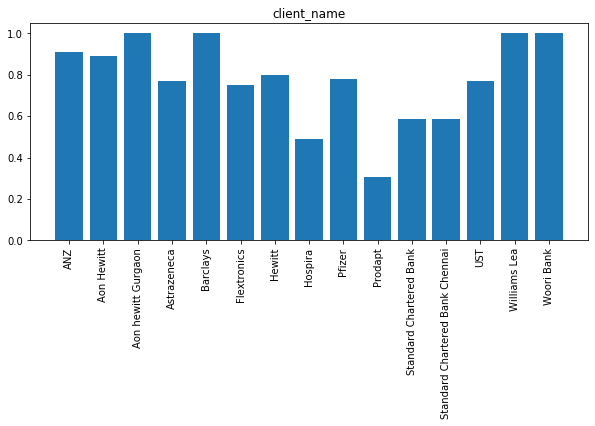

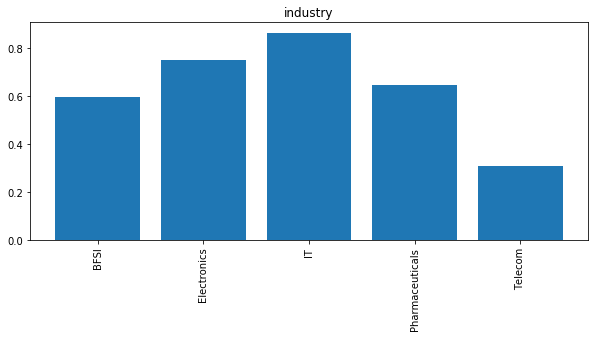

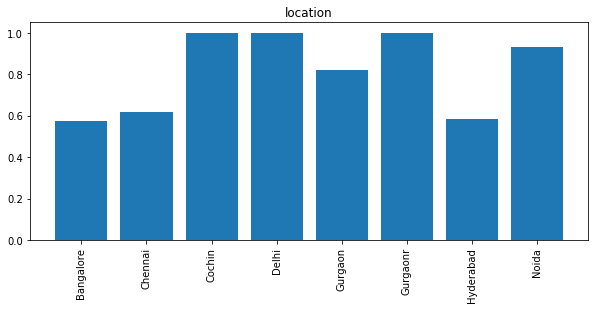

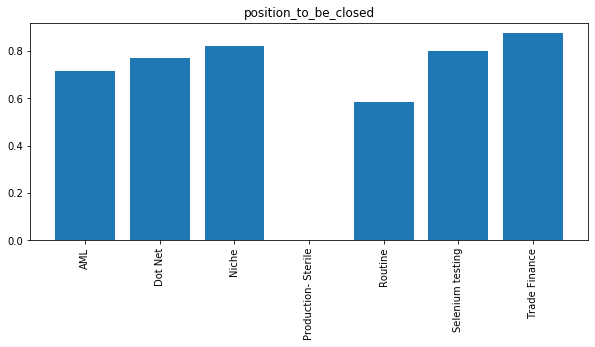

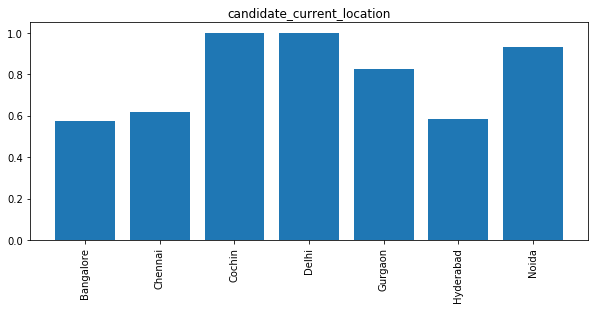

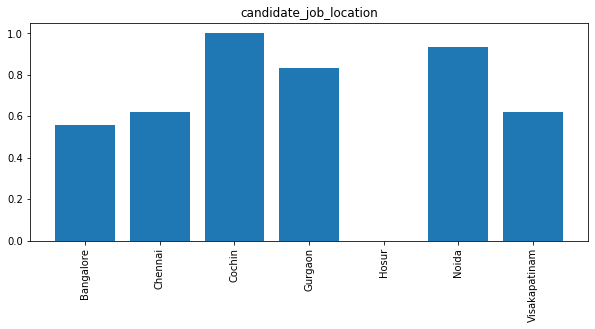

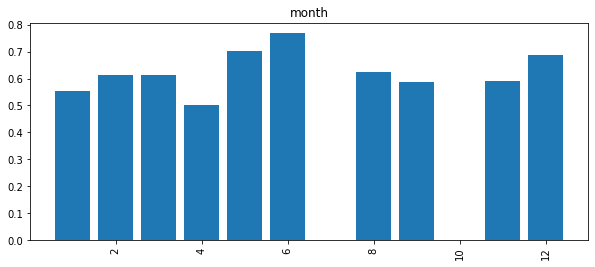

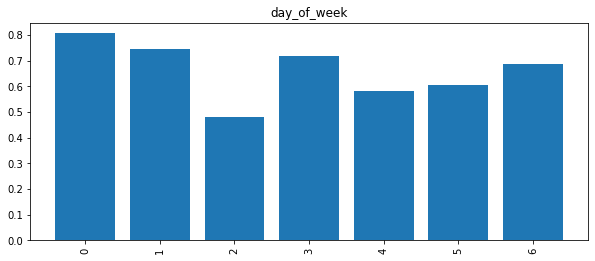

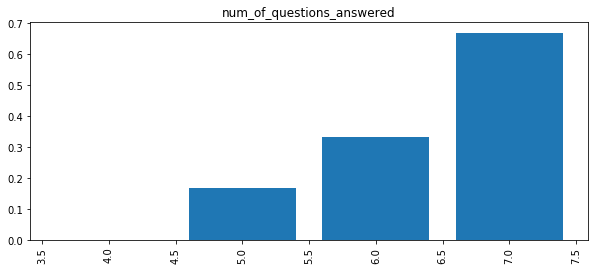

In [285]:
def my_plot(col):
    test = X.groupby([col]).sum()
    xyz = test['observed_attendance']/test['expected_attendance']
    fig, ax = plt.subplots(figsize = (10,4))
    ax.bar(list(xyz.index) , xyz)
    ax.tick_params(axis='x', labelrotation=90)
    ax.set_title(col)
    plt.savefig('../images/bar_plots.png')
    plt.show()

headers = ['client_name',
 'industry',
 'location',
 'position_to_be_closed',
 #'nature_of_skillset',
 #'interview_type',
 #'gender',
 'candidate_current_location',
 'candidate_job_location',
 #'interview_venue',
 #'candidate_native_location',
 #'marital_status',
 'month',
 'day_of_week',
 #'intv_venue_diff_from_cand_loc',
 'num_of_questions_answered']
for i in headers:
    my_plot(i)

In [286]:
X['num_of_questions_answered'] = X['num_of_questions_answered'].fillna(0)
X = X.dropna()
X = pd.get_dummies(X)

y = X['observed_attendance']
X = X.drop(columns = ['observed_attendance', 'expected_attendance', 'client_name_Woori Bank', 
                      'industry_IT', 'location_Delhi', 'position_to_be_closed_AML', 
                      'candidate_current_location_Bangalore', 'candidate_job_location_Bangalore', 
                     'client_name_Standard Chartered Bank', 'candidate_job_location_Chennai',
                     'client_name_Aon Hewitt', 'client_name_Astrazeneca', 'client_name_Flextronics',
                     'position_to_be_closed_Routine', 'client_name_Prodapt', 'client_name_UST', 
                      'client_name_Williams Lea' ,'industry_BFSI', 'location_Bangalore', 'location_Chennai',
                     'location_Cochin', 'location_Gurgaon', 'location_Hyderabad', 'location_Noida',
                     'position_to_be_closed_Production- Sterile', 'candidate_current_location_Cochin',
                     'candidate_current_location_Delhi', 'candidate_current_location_Noida',
                     'candidate_job_location_Cochin', 'candidate_job_location_Gurgaon', 
                      'candidate_job_location_Noida', 'interview_venue_Chennai',
                     'candidate_current_location_Gurgaon', 'industry_Pharmaceuticals',
                     'location_Gurgaonr', 'candidate_job_location_Hosur'
                     ])

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,4.553060,month
1,8.831403,day_of_week
2,4.891746,num_of_questions_answered
3,1.625841,client_name_ANZ
4,1.308371,client_name_Aon hewitt Gurgaon
5,1.113300,client_name_Barclays
6,4.105760,client_name_Hewitt
7,2.421524,client_name_Hospira
8,1.732329,client_name_Pfizer
9,1.170670,client_name_Standard Chartered Bank Chennai


In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [288]:
random_forest_grid = {'max_depth': [3, None],
                        'max_features': ['sqrt', 'log2', None],
                        'min_samples_split': [2, 4],
                        'min_samples_leaf': [1, 2, 4],
                        'bootstrap': [True, False],
                        'n_estimators': [10, 20, 40, 80],
                        'random_state': [1]}

rf_model_gridsearch = GridSearchCV(RandomForestClassifier(),
                                    random_forest_grid,
                                    n_jobs=-1,
                                    verbose=True,
                                    scoring='neg_mean_squared_error')

rf_model_gridsearch.fit(X_train, y_train)
rf_best_params = rf_model_gridsearch.best_params_ 
rf_model_best = rf_model_gridsearch.best_estimator_
#rf_model_best.score(X_train, y_train)

rf_y_preds = rf_model_best.predict(X_test)
rf_precision = precision_score(y_test, rf_y_preds)
rf_recall = recall_score(y_test, rf_y_preds)
rf_accuracy = accuracy_score(y_test, rf_y_preds)
print(rf_precision, rf_recall, rf_accuracy)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/home/alec/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:   10.9s


0.7530120481927711 0.8741258741258742 0.7268518518518519


[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:   13.0s finished


Feature ranking:
1. feature 2 (0.407938)
2. feature 0 (0.143138)
3. feature 1 (0.132025)
4. feature 13 (0.060565)
5. feature 11 (0.038407)
6. feature 7 (0.037094)
7. feature 16 (0.024636)
8. feature 19 (0.022696)
9. feature 8 (0.021820)
10. feature 21 (0.011590)
11. feature 20 (0.010700)
12. feature 3 (0.010235)
13. feature 23 (0.009905)
14. feature 17 (0.009838)
15. feature 18 (0.008833)
16. feature 12 (0.007638)
17. feature 22 (0.007459)
18. feature 6 (0.007256)
19. feature 10 (0.006954)
20. feature 24 (0.006166)
21. feature 15 (0.005212)
22. feature 9 (0.005063)
23. feature 5 (0.002603)
24. feature 14 (0.001818)
25. feature 4 (0.000410)
------------------------------
Feature headers:
feature 0: month
feature 1: day_of_week
feature 2: num_of_questions_answered
feature 3: client_name_ANZ
feature 4: client_name_Aon hewitt Gurgaon
feature 5: client_name_Barclays
feature 6: client_name_Hewitt
feature 7: client_name_Hospira
feature 8: client_name_Pfizer
feature 9: client_name_Standard Cha

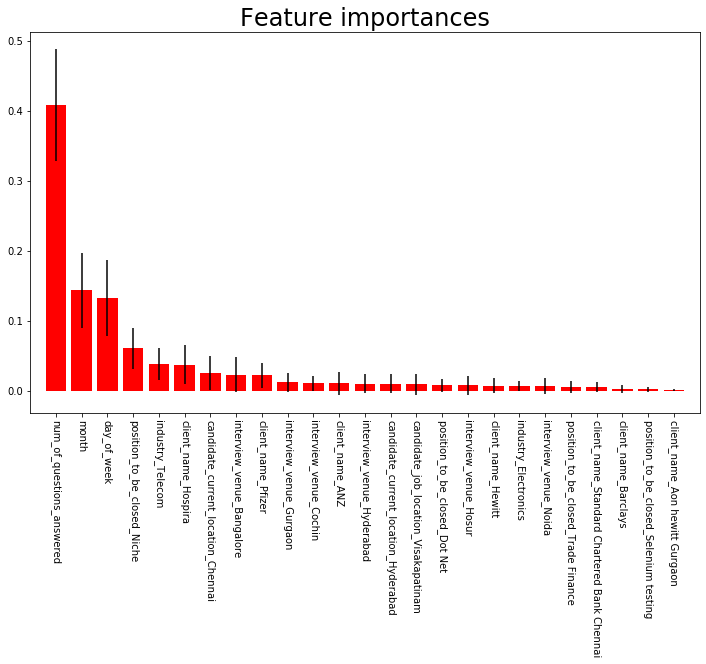

In [312]:
#Feature Importance
importances = rf_model_best.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model_best.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

print('------------------------------')
print('Feature headers:')

headers = list(X.columns.values)
for idx, val in enumerate(headers):
    print(f'feature {idx}:', val)

headers_reordered_lst=[]
for i in indices:
    headers_reordered_lst.append(headers[i])

# Plot the feature importances of the forest
plt.figure(figsize = (12,7))
plt.title("Feature importances", size=24)
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), headers_reordered_lst, rotation=270)
plt.xlim([-1, X.shape[1]])
plt.savefig('../images/feature_importance.png')
plt.show()

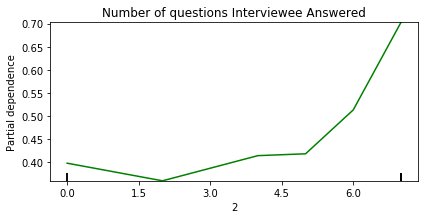

In [305]:
plot_partial_dependence(rf_model_best, X, [2]) 
plt.title('Number of Questions Interviewee Answered')
plt.savefig('../images/num_questions_partial_dependency.png')
plt.show()

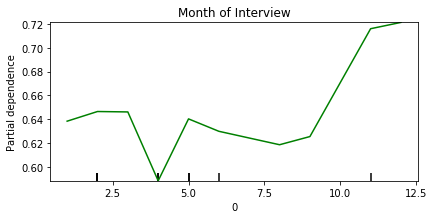

In [313]:
plot_partial_dependence(rf_model_best, X, [0])
plt.title('Month of Interview')
plt.savefig('../images/month_partial_dependency.png')
plt.show()

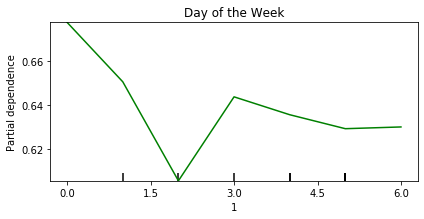

In [314]:
plot_partial_dependence(rf_model_best, X, [1])
plt.title('Day of the Week')
plt.savefig('../images/dow_partial_dependency.png')
plt.show()

features = [2, 0, 1]
fig, axs = plot_partial_dependence(rf_model_best, X, features, feature_names=X.columns, grid_resolution=100)
lims = plt.getp(axs[0],"xlim") 
myxrange = np.linspace(lims[2],lims[0],1)                                  
mymean = mean4bactransform
mysd   = sd4bactransform
newlabels = [str(round((myx*mysd)+mymean,2)) for myx in myxrange]           
plt.setp(axs, xticks=myxrange, xticklabels=newlabels)                                               
fig.suptitle('Partial dependence')
plt.subplots_adjust(top=0.9)  # tight_layout causes overlap with suptitle
fig.set_size_inches(10.5, 7.5)


In [236]:
scaler = StandardScaler()
scaler.fit(X_train)
lr1 = LogisticRegression(random_state=0).fit(scaler.transform(X_train),y_train)
y_scale_preds = lr1.predict(scaler.transform(X_test))
lr_precision = precision_score(y_test, y_scale_preds)
lr_precision

/home/alec/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7235294117647059

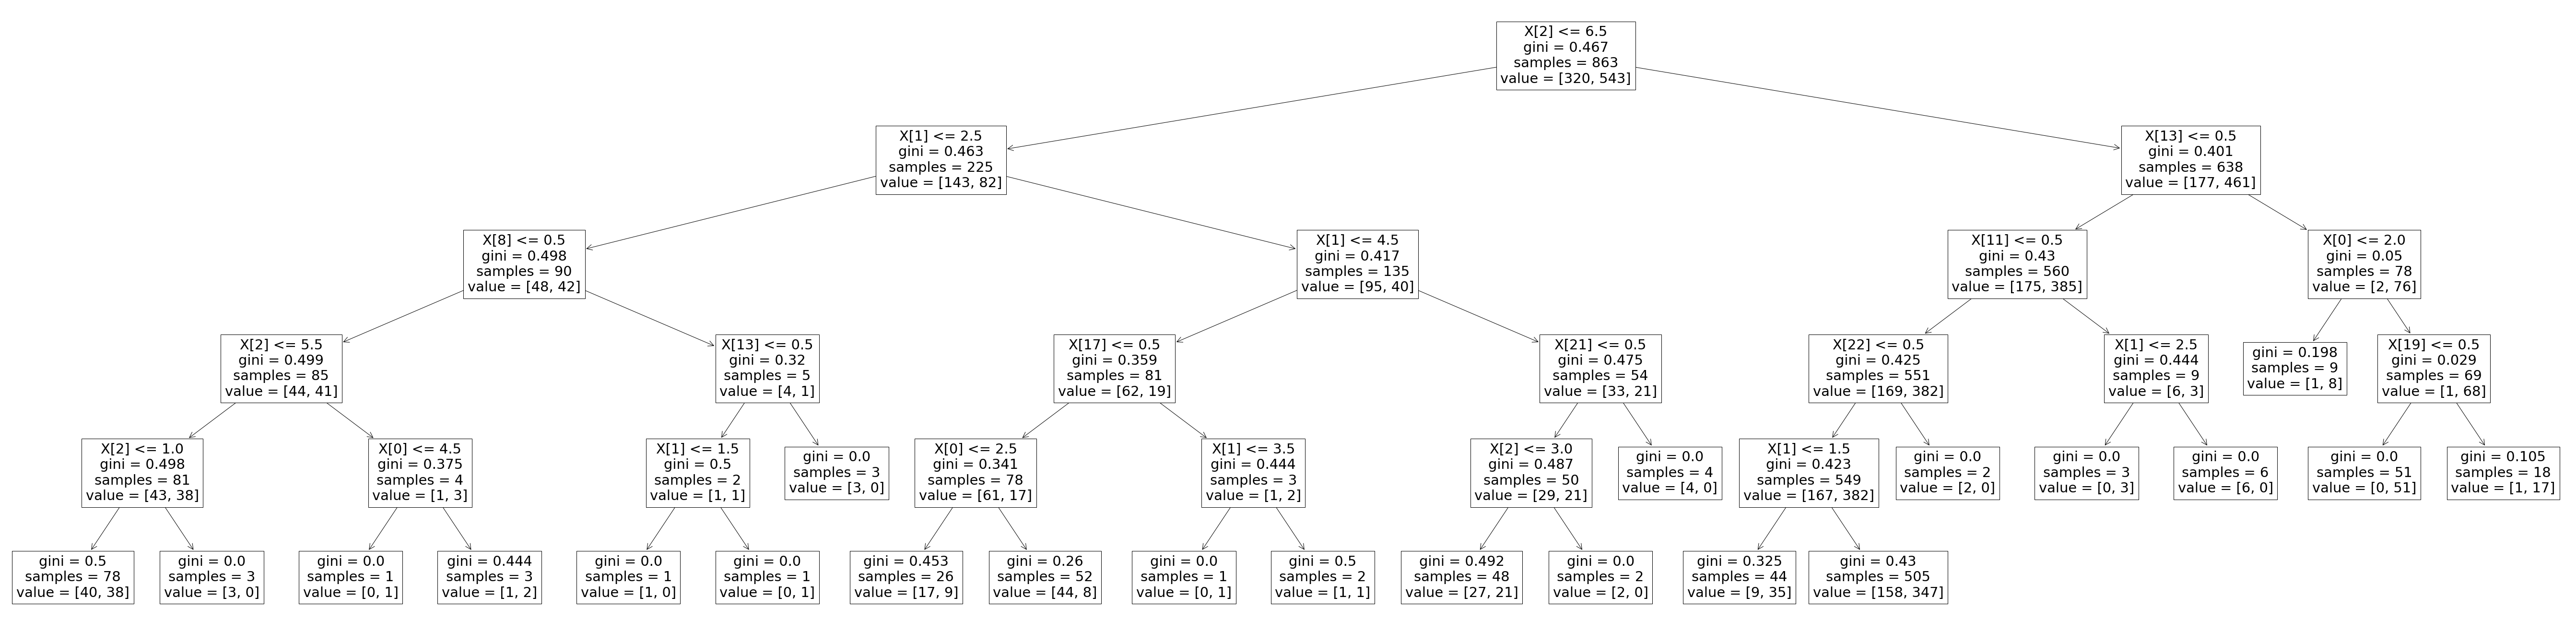

In [315]:
def decision_tree(X_train,y_train,X_test,y_test):
    model = tree.DecisionTreeClassifier(max_depth=5)
    model.fit(X_train,y_train)
    y_hat = model.predict(X_test)
    return model,y_hat

model, y_hat = decision_tree(X_train, y_train, X_test, y_test)

plt.figure(figsize=(96,24))
tree.plot_tree(model) 
plt.savefig('../images/decisison_tree.png')
plt.show()

In [238]:
dt_precision = precision_score(y_test, y_hat)
dt_precision

0.7484662576687117

In [239]:
gradient_boosting_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
                          'max_depth': [2, 4, 6],
                          'min_samples_leaf': [1, 2, 5, 10],
                          'max_features': [1.0, 0.3, 0.1],
                          'n_estimators': [500],
                          'random_state': [1]}


gbc_model_gridsearch = GridSearchCV(GradientBoostingClassifier(),
                                gradient_boosting_grid,
                                n_jobs=-1,
                                verbose=True,
                                scoring='neg_mean_squared_error')


gbc_model_gridsearch.fit(X_train, y_train)
gbc_best_params = gbc_model_gridsearch.best_params_ 
gbc_model_best = gbc_model_gridsearch.best_estimator_
#gbc_model_best.score(X_train, y_train)

gbc_y_preds = gbc_model_best.predict(X_test)
gbc_precision = precision_score(y_test, gbc_y_preds)
gbc_recall = recall_score(y_test, gbc_y_preds)
gbc_accuracy = accuracy_score(y_test, gbc_y_preds)
print(gbc_precision, gbc_recall, gbc_accuracy)

/home/alec/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   51.1s finished


0.75 0.8601398601398601 0.7175925925925926


In [244]:
adaboost_boosting_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
                          'n_estimators': [500],
                          'random_state': [1]}


ada_model_gridsearch = GridSearchCV(AdaBoostClassifier(),
                                adaboost_boosting_grid,
                                n_jobs=-1,
                                verbose=True,
                                scoring='neg_mean_squared_error')


ada_model_gridsearch.fit(X_train, y_train)
ada_best_params = ada_model_gridsearch.best_params_ 
ada_model_best = ada_model_gridsearch.best_estimator_
#gbc_model_best.score(X_train, y_train)

ada_y_preds = ada_model_best.predict(X_test)
ada_precision = precision_score(y_test, ada_y_preds)
ada_recall = recall_score(y_test, ada_y_preds)
ada_accuracy = accuracy_score(y_test, ada_y_preds)
print(ada_precision, ada_recall, ada_accuracy)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/home/alec/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:    3.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.7s finished


0.7218934911242604 0.8531468531468531 0.6851851851851852
